In [1]:
import numpy as np
import xarray as xr
import xmitgcm
import matplotlib.pyplot as plt
import xgcm

%matplotlib inline

# Compute momentum terms in temperature layers
This notebook uses output from the `tutorial_channel` verification experiment. This experiment already has `pkg/layers` included, so we can sanity test the results.

In [2]:
!pwd

/Users/ewd/Code/MITgcm/verification/tutorial_channel


In [3]:
v_mom = xmitgcm.open_mdsdataset('run/Diags/', grid_dir='run', prefix='v_mom')
stateDiag = xmitgcm.open_mdsdataset('run/Diags/', grid_dir='run', prefix='state')
layDiag = xmitgcm.open_mdsdataset('run/Diags/', grid_dir='run', prefix='layDiag')
# lots of warnings from these because of an impending change in xarray. No need to worry about them.

/Users/ewd/anaconda3/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/Users/ewd/anaconda3/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structur

## Look at the datasets briefly

In [4]:
v_mom

<xarray.Dataset>
Dimensions:  (XC: 20, XG: 20, YC: 40, YG: 40, Z: 49, Zl: 49, Zp1: 50, Zu: 49, time: 748)
Coordinates:
  * XC       (XC) >f8 2.5e+04 7.5e+04 1.25e+05 ... 8.75e+05 9.25e+05 9.75e+05
  * YC       (YC) >f8 2.5e+04 7.5e+04 1.25e+05 ... 1.875e+06 1.925e+06 1.975e+06
  * XG       (XG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 8e+05 8.5e+05 9e+05 9.5e+05
  * YG       (YG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 1.85e+06 1.9e+06 1.95e+06
  * Z        (Z) >f8 -2.744 -8.584 -15.18 ... -3.609e+03 -3.758e+03 -3.908e+03
  * Zp1      (Zp1) >f8 0.0 -5.487 -11.68 ... -3.684e+03 -3.833e+03 -3.982e+03
  * Zu       (Zu) >f8 -5.487 -11.68 -18.67 ... -3.684e+03 -3.833e+03 -3.982e+03
  * Zl       (Zl) >f8 0.0 -5.487 -11.68 ... -3.535e+03 -3.684e+03 -3.833e+03
    rA       (YC, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dxG      (YG, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dyG      (YC, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    Depth    (YC, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    rAz      (YG, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dxC      (YC, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dyC      (YG, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    rAw      (YC, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    rAs      (YG, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    drC      (Zp1) >f8 dask.array<chunksize=(50,), meta=np.ndarray>
    drF      (Z) >f8 dask.array<chunksize=(49,), meta=np.ndarray>
    PHrefC   (Z) >f8 dask.array<chunksize=(49,), meta=np.ndarray>
    PHrefF   (Zp1) >f8 dask.array<chunksize=(50,), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f8 dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    hFacW    (Z, YC, XG) >f8 dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    hFacS    (Z, YG, XC) >f8 dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    maskW    (Z, YC, XG) bool dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    maskS    (Z, YG, XC) bool dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) int64 86 173 259 346 432 ... 64282 64368 64454 64541 64627
Data variables:
    VVEL     (time, Z, YG, XC) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>
    Vm_Diss  (time, Z, YG, XC) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>

In [5]:
stateDiag

<xarray.Dataset>
Dimensions:   (XC: 20, XG: 20, YC: 40, YG: 40, Z: 49, Zl: 49, Zp1: 50, Zu: 49, time: 748)
Coordinates:
    iter      (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time      (time) int64 86 173 259 346 432 ... 64282 64368 64454 64541 64627
  * XC        (XC) >f8 2.5e+04 7.5e+04 1.25e+05 ... 8.75e+05 9.25e+05 9.75e+05
  * YC        (YC) >f8 2.5e+04 7.5e+04 1.25e+05 ... 1.925e+06 1.975e+06
  * XG        (XG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 8e+05 8.5e+05 9e+05 9.5e+05
  * YG        (YG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 1.85e+06 1.9e+06 1.95e+06
  * Z         (Z) >f8 -2.744 -8.584 -15.18 ... -3.609e+03 -3.758e+03 -3.908e+03
  * Zp1       (Zp1) >f8 0.0 -5.487 -11.68 ... -3.684e+03 -3.833e+03 -3.982e+03
  * Zu        (Zu) >f8 -5.487 -11.68 -18.67 ... -3.684e+03 -3.833e+03 -3.982e+03
  * Zl        (Zl) >f8 0.0 -5.487 -11.68 ... -3.535e+03 -3.684e+03 -3.833e+03
    rA        (YC, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dxG       (YG, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dyG       (YC, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    Depth     (YC, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    rAz       (YG, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dxC       (YC, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dyC       (YG, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    rAw       (YC, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    rAs       (YG, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    drC       (Zp1) >f8 dask.array<chunksize=(50,), meta=np.ndarray>
    drF       (Z) >f8 dask.array<chunksize=(49,), meta=np.ndarray>
    PHrefC    (Z) >f8 dask.array<chunksize=(49,), meta=np.ndarray>
    PHrefF    (Zp1) >f8 dask.array<chunksize=(50,), meta=np.ndarray>
    hFacC     (Z, YC, XC) >f8 dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    hFacW     (Z, YC, XG) >f8 dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    hFacS     (Z, YG, XC) >f8 dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    maskC     (Z, YC, XC) bool dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    maskW     (Z, YC, XG) bool dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    maskS     (Z, YG, XC) bool dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
Data variables:
    THETA     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>
    VVEL      (time, Z, YG, XC) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>
    UVEL      (time, Z, YC, XG) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>
    WVEL      (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>
    momVort3  (time, Z, YG, XG) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>
    momHDiv   (time, Z, YC, XC) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>
    CONVADJ   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>
    PsiVEL    (time, Z, YG, XG) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>
    VAHDLTHQ  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 49, 40, 20), meta=np.ndarray>

In [6]:
# output from pkg/layers doesn't come with a nice coordinate, so copy this from the config.
layer_bounds = np.array([-2.00, -1.75, -1.50, -1.25,
                        -1.00, -0.75, -0.50, -0.25,
                         0.00,  0.25,  0.50,  0.75,
                         1.00,  1.25,  1.50,  1.75,
                         2.00,  2.25,  2.50,  2.75,
                         3.00,  3.25,  3.50,  3.75,
                         4.00,  4.25,  4.50,   5.0,
                         5.5,    6.0,   6.5,   7.0,
                         7.5,    8.0,   8.5,   9.0,
                         9.5,   10.0,])
layer_centres = (layer_bounds[1:] + layer_bounds[:-1])/2

In [7]:
layDiag = layDiag.rename({'_UNKNOWN_':'temperature'})
layDiag = layDiag.assign_coords(temperature=layer_centres)

In [8]:
layDiag

<xarray.Dataset>
Dimensions:      (XC: 20, XG: 20, YC: 40, YG: 40, Z: 49, Zl: 49, Zp1: 50, Zu: 49, temperature: 37, time: 748)
Coordinates:
  * XC           (XC) >f8 2.5e+04 7.5e+04 1.25e+05 ... 9.25e+05 9.75e+05
  * YC           (YC) >f8 2.5e+04 7.5e+04 1.25e+05 ... 1.925e+06 1.975e+06
  * XG           (XG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 8.5e+05 9e+05 9.5e+05
  * YG           (YG) >f8 0.0 5e+04 1e+05 1.5e+05 ... 1.85e+06 1.9e+06 1.95e+06
  * Z            (Z) >f8 -2.744 -8.584 -15.18 ... -3.758e+03 -3.908e+03
  * Zp1          (Zp1) >f8 0.0 -5.487 -11.68 ... -3.833e+03 -3.982e+03
  * Zu           (Zu) >f8 -5.487 -11.68 -18.67 ... -3.833e+03 -3.982e+03
  * Zl           (Zl) >f8 0.0 -5.487 -11.68 ... -3.535e+03 -3.684e+03 -3.833e+03
    rA           (YC, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dxG          (YG, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dyG          (YC, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    Depth        (YC, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    rAz          (YG, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dxC          (YC, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    dyC          (YG, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    rAw          (YC, XG) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    rAs          (YG, XC) >f8 dask.array<chunksize=(40, 20), meta=np.ndarray>
    drC          (Zp1) >f8 dask.array<chunksize=(50,), meta=np.ndarray>
    drF          (Z) >f8 dask.array<chunksize=(49,), meta=np.ndarray>
    PHrefC       (Z) >f8 dask.array<chunksize=(49,), meta=np.ndarray>
    PHrefF       (Zp1) >f8 dask.array<chunksize=(50,), meta=np.ndarray>
    hFacC        (Z, YC, XC) >f8 dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    hFacW        (Z, YC, XG) >f8 dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    hFacS        (Z, YG, XC) >f8 dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    maskC        (Z, YC, XC) bool dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    maskW        (Z, YC, XG) bool dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    maskS        (Z, YG, XC) bool dask.array<chunksize=(49, 40, 20), meta=np.ndarray>
    iter         (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time         (time) int64 86 173 259 346 432 ... 64368 64454 64541 64627
  * temperature  (temperature) float64 -1.875 -1.625 -1.375 ... 8.75 9.25 9.75
Data variables:
    LaVH1TH      (time, temperature, YG, XC) float64 dask.array<chunksize=(1, 37, 40, 20), meta=np.ndarray>
    LaHs1TH      (time, temperature, YG, XC) float64 dask.array<chunksize=(1, 37, 40, 20), meta=np.ndarray>
    LaVa1TH      (time, temperature, YG, XC) float64 dask.array<chunksize=(1, 37, 40, 20), meta=np.ndarray>

# Create an `xgcm` grid object
Use the new "metrics" feature to allow it to compute grid-aware integrals.

In [9]:
v_mom['drW'] = v_mom.hFacW * v_mom.drF #vertical cell size at u point
v_mom['drS'] = v_mom.hFacS * v_mom.drF #vertical cell size at v point
v_mom['drC'] = v_mom.hFacC * v_mom.drF #vertical cell size at tracer point

metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drW', 'drS', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}
grid = xgcm.Grid(v_mom, periodic=['X'], metrics=metrics)
grid

<xgcm.Grid>
Z Axis (not periodic):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
T Axis (not periodic):
  * center   time
X Axis (periodic):
  * center   XC --> left
  * left     XG --> center
Y Axis (not periodic):
  * center   YC --> left
  * left     YG --> center

In [10]:
theta_yg = grid.interp(stateDiag.THETA, axis='Y', boundary='extend')
theta_xg = grid.interp(stateDiag.THETA, axis='X', boundary='extend')

## Define a new array to hold the variables in layer coordinates

In [11]:
# This creates a full size array - this will likely lead to memory issues in big simulations.
# If that happens, you should do each timestep individually in its own data array and then
# save them to separate NetCDF files. After that you can use open_mfdataset to access them.
v_in_layers = xr.DataArray(np.zeros((stateDiag.time.shape[0], layDiag.temperature.shape[0],
                                     stateDiag.YG.shape[0], stateDiag.XC.shape[0])),
                           coords=[stateDiag.time, layDiag.temperature, stateDiag.YG, stateDiag.XC],
                           dims=['time', 'temperature', 'YG', 'XC'])

In [12]:
v_in_layers

<xarray.DataArray (time: 748, temperature: 37, YG: 40, XC: 20)>
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [

The idea is to compute layer thickness and vertically integrated transport (after masking out all cells not in the layer). Then, divide transport by thickness to get layer averaged velocity. This relies on having at least one cell in the layer, so very thin layers with very thick cells might give bad results.

To make this work for some other variable, replace the `stateDiag.VVEL` in these calculations. If you use a variable at a different grid location (e.g. `UVEL`), then you will need to interpolate temperature to that location.

In [13]:
i = 25

layer_thickness = ((stateDiag.VVEL.where(
                            theta_yg>=layer_bounds[i]).where(
                            theta_yg<layer_bounds[i+1])*0 +1)* stateDiag.drF).sum(dim='Z')


layer_vvel = ((grid.integrate((stateDiag.VVEL.where(
                            theta_yg>=layer_bounds[i]).where(
                            theta_yg<layer_bounds[i+1])), 'Z'))/layer_thickness)



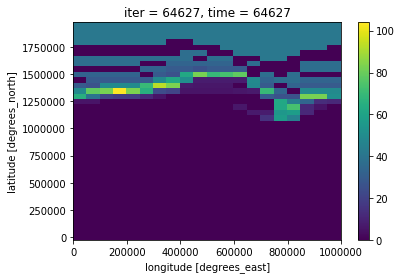

In [14]:
layer_thickness[-1,:,:].plot()

/Users/ewd/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


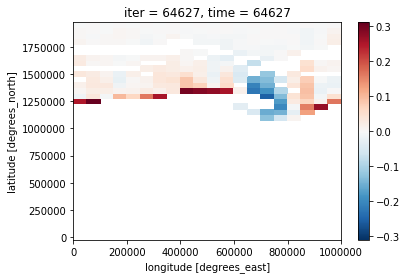

In [15]:
layer_vvel[-1,:,:].plot()

Now loop over all layers, using the layer bounds to mask the arrays.

In [16]:
for i in range(layDiag.temperature.shape[0]):
    layer_thickness = ((stateDiag.VVEL.where(
                            theta_yg>=layer_bounds[i]).where(
                            theta_yg<layer_bounds[i+1])*0 +1)* stateDiag.drF).sum(dim='Z')

    v_in_layers[:,i,:,:] = ((grid.integrate((stateDiag.VVEL.where(
                            theta_yg>=layer_bounds[i]).where(
                            theta_yg<layer_bounds[i+1])), 'Z'))/layer_thickness)

/Users/ewd/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/Users/ewd/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/Users/ewd/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/Users/ewd/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/Users/ewd/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/Users/ewd/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/Users/ewd/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide


# How does this compare with `pkg/layers` output?
We can already get velocity and thickness data from `pkg/layers`. Ideally, that output should be equivalent to the fields we just computed.

In [17]:
# pick some time and vertical coordinate values to plot
t = -1
k = 30

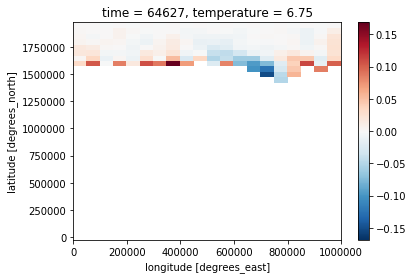

In [18]:
v_in_layers[t,k,:,:].plot()

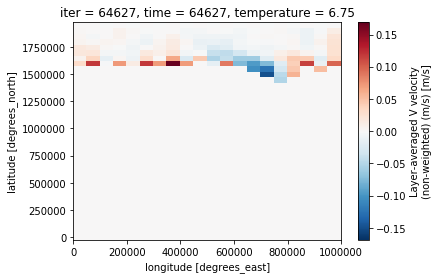

In [19]:
layDiag.LaVa1TH[t,k,:,:].plot()

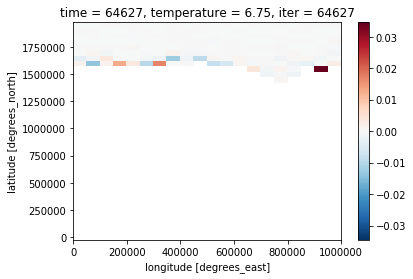

In [20]:
# look at the difference. It's generally pretty small. Small enough? Dunno.
(v_in_layers - layDiag.LaVa1TH)[t,k,:,:].plot()